In [61]:
#Loading the dataset
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
#Exploratory Data Analysis
import seaborn as sns
from collections import Counter
#Data Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
#Data Splitting
from sklearn.model_selection import train_test_split
#Data Modelling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Warning
import warnings
warnings.filterwarnings('ignore')

In [62]:
data=pd.read_csv("heart.csv")

In [63]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,No,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,No,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,1,140,221,0,1,164,Yes,0.0,2,0,2,1
1021,60,Male,0,125,258,0,0,141,Yes,2.8,1,1,3,0
1022,47,Male,0,110,275,0,0,118,Yes,1.0,1,1,2,0
1023,50,Female,0,110,254,0,0,159,No,0.0,2,0,2,1


In [64]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,No,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,No,1.9,1,3,2,0


In [65]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,Male,1,140,221,0,1,164,Yes,0.0,2,0,2,1
1021,60,Male,0,125,258,0,0,141,Yes,2.8,1,1,3,0
1022,47,Male,0,110,275,0,0,118,Yes,1.0,1,1,2,0
1023,50,Female,0,110,254,0,0,159,No,0.0,2,0,2,1
1024,54,Male,0,120,188,0,1,113,No,1.4,1,1,3,0


In [66]:
data.shape

(1025, 14)

In [67]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 112.2+ KB


In [69]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
le = LabelEncoder()
label = le.fit_transform(data['sex'])
label

array([1, 1, 1, ..., 1, 0, 1])

In [71]:
data.drop("sex", axis=1, inplace=True)
data["sex"] = label

In [72]:
label1 = le.fit_transform(data["exang"])
label1

array([0, 1, 1, ..., 1, 0, 0])

In [73]:
data.drop("exang", axis=1, inplace=True)
data["exang"] = label1

In [74]:
data.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,sex,exang
0,52,0,125,212,0,1,168,1.0,2,2,3,0,1,0
1,53,0,140,203,1,0,155,3.1,0,0,3,0,1,1
2,70,0,145,174,0,1,125,2.6,0,0,3,0,1,1
3,61,0,148,203,0,1,161,0.0,2,1,3,0,1,0
4,62,0,138,294,1,1,106,1.9,1,3,2,0,0,0


In [75]:
data.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target,sex,exang
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,1.071512,1.385366,0.754146,2.323902,0.513171,0.695610,0.336585
std,9.072290,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,1.175053,0.617755,1.030798,0.620660,0.500070,0.460373,0.472772
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.800000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Number of people')

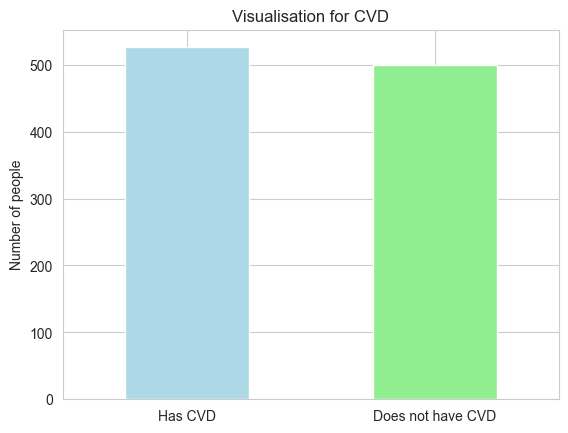

In [76]:
fig = data.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has CVD', "Does not have CVD"], rotation=0);
plt.title("Visualisation for CVD")
plt.ylabel("Number of people")

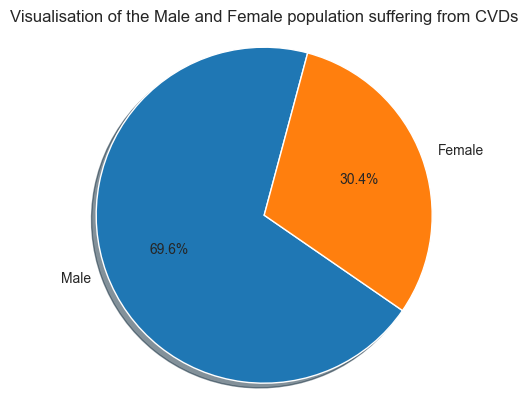

In [77]:
labels = 'Male', 'Female'
explode = (0, 0)
fig1,ax1 = plt.subplots()
ax1.pie(data.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=75)
ax1.axis('equal')
plt.title("Visualisation of the Male and Female population suffering from CVDs")
plt.show()

Text(0.5, 0, 'Target')

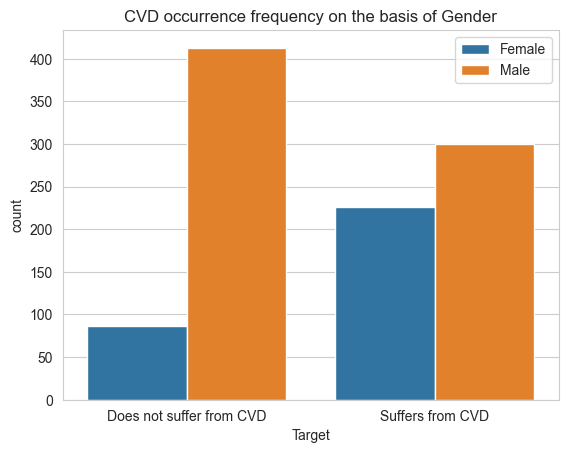

In [78]:
fig2 = sns.countplot(x = 'target', data = data, hue = 'sex')
fig2.set_xticklabels(labels=["Does not suffer from CVD", 'Suffers from CVD'], rotation=0)
plt.legend(['Female','Male'])
plt.title("CVD occurrence frequency on the basis of Gender");
plt.xlabel("Target")

Text(0.5, 1.0, 'Chest Pain type vs Count')

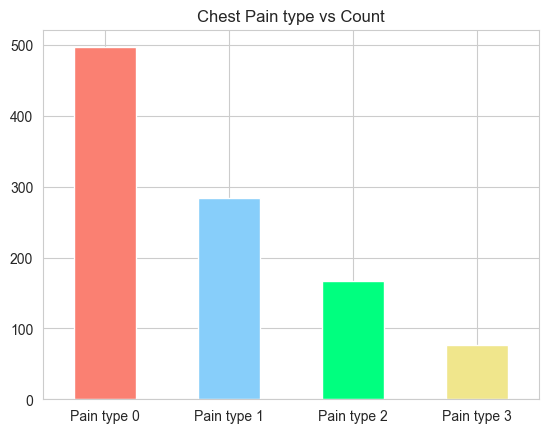

In [79]:
fig3 = data.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig3.set_xticklabels(labels=['Pain type 0', 'Pain type 1', 'Pain type 2', 'Pain type 3'], rotation=0)
plt.title('Chest Pain type vs Count')

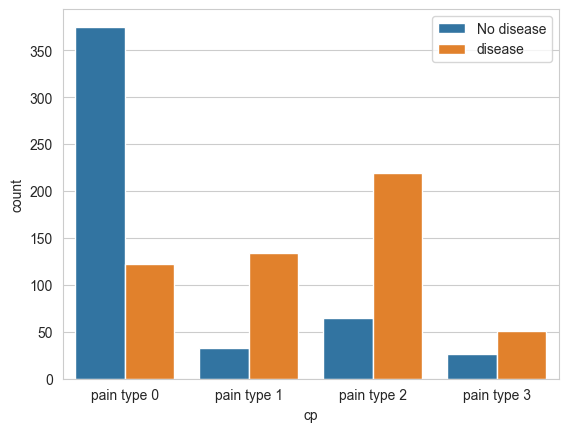

In [80]:
fig4 = sns.countplot(x = 'cp', data = data, hue = 'target')
fig4.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No disease', 'disease'])

Text(0, 0.5, 'Maximum Heart Rate')

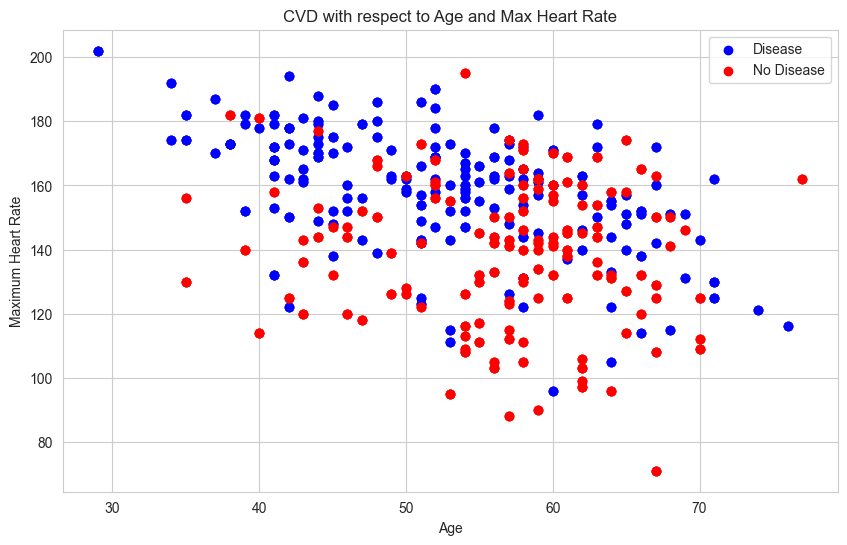

In [81]:
plt.figure(figsize=(10,6))
#Plotting the values for people who have CVDs
plt.scatter(data.age[data.target==1], data.thalach[data.target==1],c="blue")
#Plotting the values for people who don't have CVDs
plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c="red")
#Adding information
plt.title("CVD with respect to Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Maximum Heart Rate")

Text(0, 0.5, 'Serum Cholesterol')

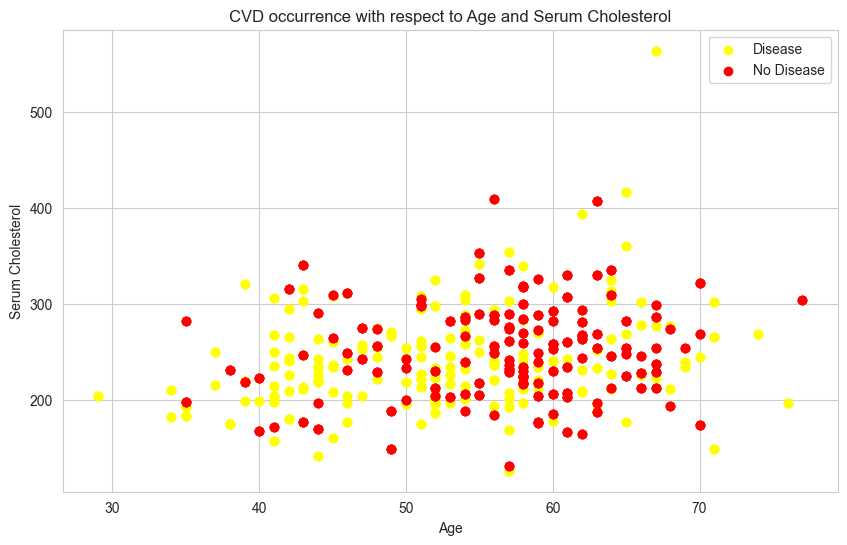

In [82]:
df=data
# Creating another figure
plt.figure(figsize=(10,6))

#Plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1],df.chol[df.target==1],c="yellow")

#Plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0],df.chol[df.target==0],c="red")

# Add some helpful info
plt.title("CVD occurrence with respect to Age and Serum Cholesterol")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum Cholesterol")

Sine chart


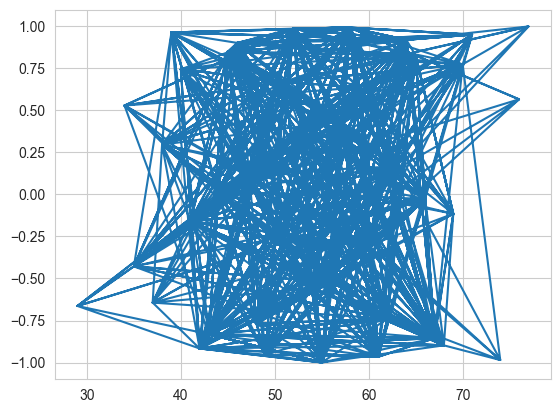

In [83]:
print('Sine chart')
x = np.array(data['age'])   
y = np.sin(x)
plt.plot(x,y)
plt.show()

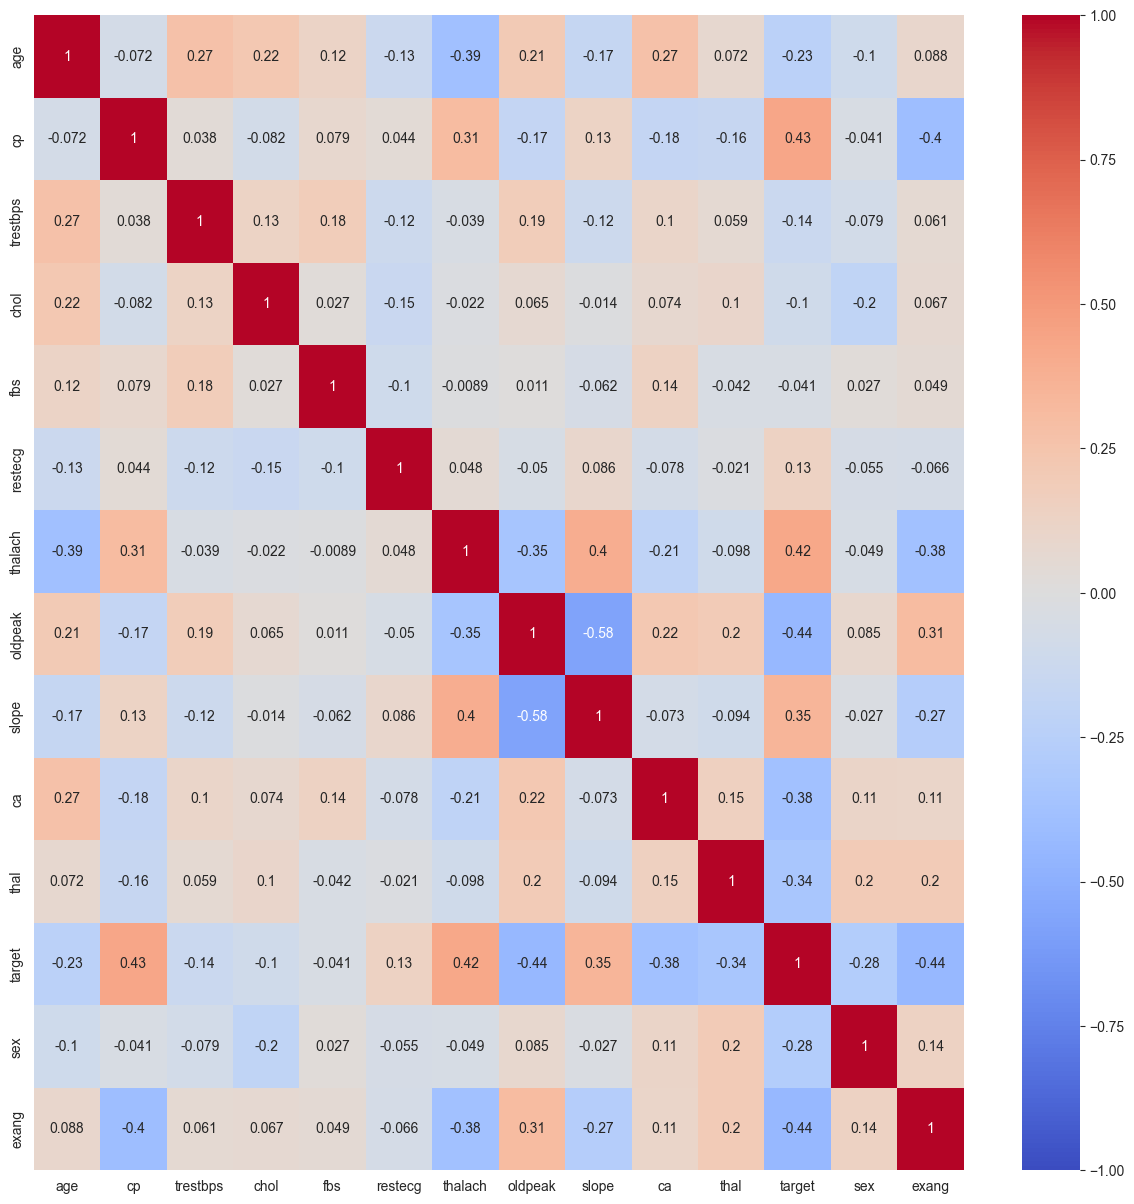

In [84]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.show()

In [85]:
X = data.drop("target",axis=1)
Y = data["target"]

In [86]:
cols=X.columns
for col in cols:
   X[col]=minmax_scale(X[col])
X

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,sex,exang
0,0.479167,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.161290,1.0,0.50,1.000000,1.0,0.0
1,0.500000,0.000000,0.433962,0.175799,1.0,0.0,0.641221,0.500000,0.0,0.00,1.000000,1.0,1.0
2,0.854167,0.000000,0.481132,0.109589,0.0,0.5,0.412214,0.419355,0.0,0.00,1.000000,1.0,1.0
3,0.666667,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.000000,1.0,0.25,1.000000,1.0,0.0
4,0.687500,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.306452,0.5,0.75,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,0.333333,0.433962,0.216895,0.0,0.5,0.709924,0.000000,1.0,0.00,0.666667,1.0,1.0
1021,0.645833,0.000000,0.292453,0.301370,0.0,0.0,0.534351,0.451613,0.5,0.25,1.000000,1.0,1.0
1022,0.375000,0.000000,0.150943,0.340183,0.0,0.0,0.358779,0.161290,0.5,0.25,0.666667,1.0,1.0
1023,0.437500,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.000000,1.0,0.00,0.666667,0.0,0.0


In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state =42)

In [88]:
def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100}%")
        print("______________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("______________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100}%")
        print("_____________________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_____________________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

Logistic Regression

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

Training Data

In [90]:
#For Linear Regression
print_score(lr, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 85.58558558558559%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.885813    0.832891  0.855856    0.859352      0.858240
recall       0.802508    0.904899  0.855856    0.853703      0.855856
f1-score     0.842105    0.867403  0.855856    0.854754      0.855286
support    319.000000  347.000000  0.855856  666.000000    666.000000
______________________________________________________________________
Confusion Matrix: 
 [[256  63]
 [ 33 314]]



Testing Data

In [92]:
#For Logistic Regression
print_score(lr, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 83.84401114206128%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.891026    0.798030   0.83844    0.844528      0.844657
recall       0.772222    0.905028   0.83844    0.838625      0.838440
f1-score     0.827381    0.848168   0.83844    0.837774      0.837745
support    180.000000  179.000000   0.83844  359.000000    359.000000
_____________________________________________________________________
Confusion Matrix: 
 [[139  41]
 [ 17 162]]



Naive Bayes

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

Training Data

In [94]:
#For Naive Bayes
print_score(nb, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 85.21617852161785%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872611    0.836228  0.852162    0.854420      0.853481
recall       0.805882    0.893899  0.852162    0.849891      0.852162
f1-score     0.837920    0.864103  0.852162    0.851012      0.851687
support    340.000000  377.000000  0.852162  717.000000    717.000000
______________________________________________________________________
Confusion Matrix: 
 [[274  66]
 [ 40 337]]



Testing Data

In [95]:
#For Naive Bayes
print_score(nb, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 81.4935064935065%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880597    0.764368  0.814935    0.822482      0.824369
recall       0.742138    0.892617  0.814935    0.817378      0.814935
f1-score     0.805461    0.823529  0.814935    0.814495      0.814202
support    159.000000  149.000000  0.814935  308.000000    308.000000
_____________________________________________________________________
Confusion Matrix: 
 [[118  41]
 [ 16 133]]



Random Forest Classifier

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state =42)
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5)

Training Data

In [97]:
#For Random Forest
print_score(rf, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 95.25801952580196%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.975155    0.934177   0.95258    0.954666      0.953609
recall       0.923529    0.978780   0.95258    0.951155      0.952580
f1-score     0.948640    0.955959   0.95258    0.952300      0.952488
support    340.000000  377.000000   0.95258  717.000000    717.000000
______________________________________________________________________
Confusion Matrix: 
 [[314  26]
 [  8 369]]



Testing Data

In [98]:
#For Random Forest
print_score(rf, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 89.28571428571429%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.931507    0.858025  0.892857    0.894766      0.895959
recall       0.855346    0.932886  0.892857    0.894116      0.892857
f1-score     0.891803    0.893891  0.892857    0.892847      0.892813
support    159.000000  149.000000  0.892857  308.000000    308.000000
_____________________________________________________________________
Confusion Matrix: 
 [[136  23]
 [ 10 139]]



Decision Tree Classifier

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state =42)
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

Training Data

In [100]:
#For Decision Tree
print_score(dt, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 92.46861924686193%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.874710  0.924686    0.937355      0.934122
recall       0.841176    1.000000  0.924686    0.920588      0.924686
f1-score     0.913738    0.933168  0.924686    0.923453      0.923955
support    340.000000  377.000000  0.924686  717.000000    717.000000
______________________________________________________________________
Confusion Matrix: 
 [[286  54]
 [  0 377]]



Testing Data

In [101]:
#For Decision Tree
print_score(dt, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 84.4155844155844%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.951220    0.772973  0.844156    0.862096      0.864990
recall       0.735849    0.959732  0.844156    0.847790      0.844156
f1-score     0.829787    0.856287  0.844156    0.843037      0.842607
support    159.000000  149.000000  0.844156  308.000000    308.000000
_____________________________________________________________________
Confusion Matrix: 
 [[117  42]
 [  6 143]]



Support Vector Classifier

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state =42)
svc =  SVC()
svc.fit(X_train, Y_train)

SVC()

Training Data

In [103]:
#For Support Vector Classifier
print_score(svc, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 91.07391910739192%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.923313    0.900256  0.910739    0.911784      0.911189
recall       0.885294    0.933687  0.910739    0.909491      0.910739
f1-score     0.903904    0.916667  0.910739    0.910285      0.910615
support    340.000000  377.000000  0.910739  717.000000    717.000000
______________________________________________________________________
Confusion Matrix: 
 [[301  39]
 [ 25 352]]



Testing Data

In [104]:
#For Support Vector Classifier
print_score(svc, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 87.66233766233766%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.917241    0.840491  0.876623    0.878866      0.880112
recall       0.836478    0.919463  0.876623    0.877971      0.876623
f1-score     0.875000    0.878205  0.876623    0.876603      0.876551
support    159.000000  149.000000  0.876623  308.000000    308.000000
_____________________________________________________________________
Confusion Matrix: 
 [[133  26]
 [ 12 137]]



K-Nearest Neighbour

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Training Data

In [106]:
#For KNN
print_score(knn, X_train, Y_train, X_test, Y_test, train=True)

Train Result:
Accuracy Score: 94.00278940027894%
______________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926761    0.953039  0.940028    0.939900      0.940358
recall       0.950867    0.929919  0.940028    0.940393      0.940028
f1-score     0.938659    0.941337  0.940028    0.939998      0.940045
support    346.000000  371.000000  0.940028  717.000000    717.000000
______________________________________________________________________
Confusion Matrix: 
 [[329  17]
 [ 26 345]]



Testing Data

In [107]:
#For KNN
print_score(knn, X_train, Y_train, X_test, Y_test, train=False)

Test Result:
Accuracy Score: 86.03896103896103%
_____________________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.857143    0.863636   0.86039    0.860390      0.860411
recall       0.862745    0.858065   0.86039    0.860405      0.860390
f1-score     0.859935    0.860841   0.86039    0.860388      0.860391
support    153.000000  155.000000   0.86039  308.000000    308.000000
_____________________________________________________________________
Confusion Matrix: 
 [[132  21]
 [ 22 133]]



In [108]:
lr_predicted = lr.predict(X_test)
lr_acc_score = accuracy_score(Y_test, lr_predicted)

nb_predicted = nb.predict(X_test)
nb_acc_score = accuracy_score(Y_test, nb_predicted)

rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(Y_test, rf_predicted)

dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(Y_test, dt_predicted)

svc_predicted = svc.predict(X_test)
svc_acc_score = accuracy_score(Y_test, svc_predicted)

knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(Y_test, knn_predicted)

In [48]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Decision Tree','K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,dt_acc_score*100,knn_acc_score*100,svc_acc_score*100]})
model_ev.sort_values("Accuracy", axis = 0, ascending = True,
                 inplace = True, na_position ='last')

model_ev

,Model,Accuracy
1,Naive Bayes,81.493506
0,Logistic Regression,84.090909
4,K-Nearest Neighbour,86.038961
5,Support Vector Machine,90.259740
3,Decision Tree,90.909091
2,Random Forest,93.181818


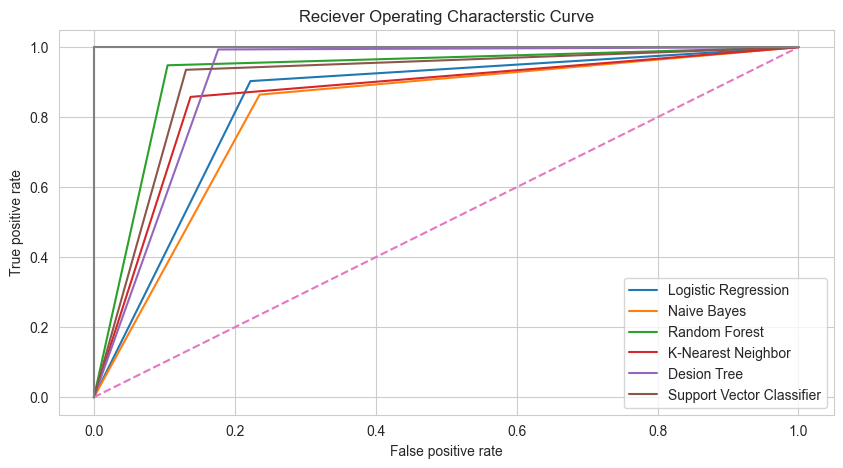

In [110]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(Y_test,lr_predicted)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(Y_test,nb_predicted)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(Y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(Y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(Y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(Y_test,svc_predicted)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

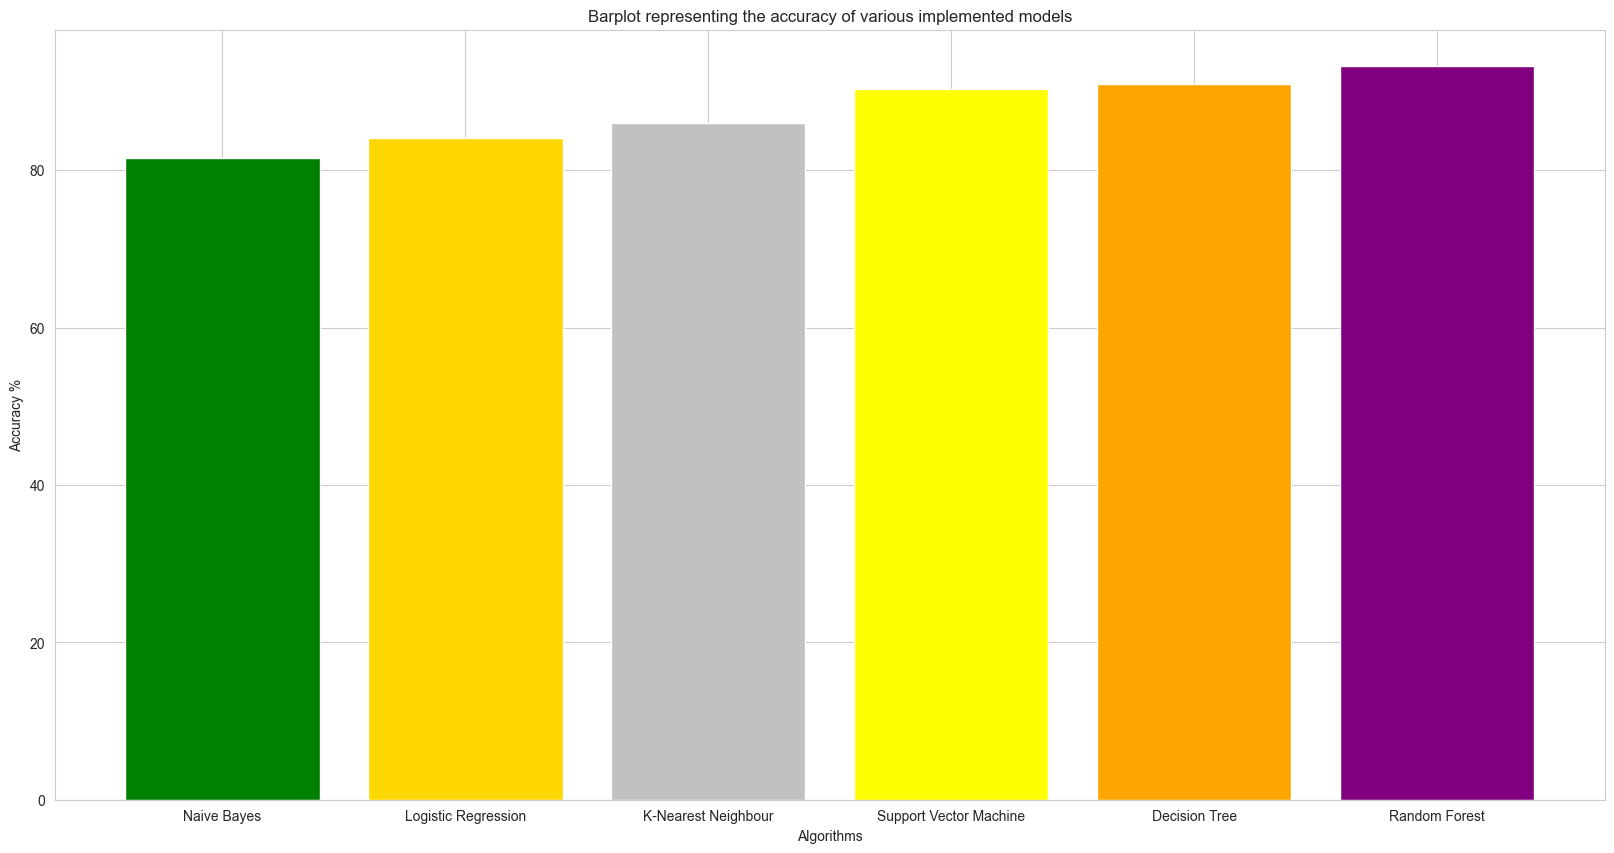

In [111]:
colors = ['green','gold','silver','yellow','orange','purple']
plt.figure(figsize=(20,10))
plt.title("Barplot representing the accuracy of various implemented models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [112]:
# from sklearn.feature_selection import RFE
# imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
#        'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': knn.feature_importances_})
# plt.figure(figsize=(10,4))
# plt.title("barplot Represent feature importance ")
# plt.xlabel("Importance ")
# plt.ylabel("Features")
# plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
# plt.show()

>0.01, train: 0.940, test: 0.860
>0.02, train: 0.940, test: 0.860
>0.03, train: 0.940, test: 0.860
>0.04, train: 0.940, test: 0.860
>0.05, train: 0.940, test: 0.860
>0.06, train: 0.940, test: 0.860
>0.07, train: 0.940, test: 0.860
>0.08, train: 0.940, test: 0.860
>0.09, train: 0.940, test: 0.860
>0.10, train: 0.940, test: 0.860
>0.11, train: 0.940, test: 0.860
>0.12, train: 0.940, test: 0.860
>0.13, train: 0.940, test: 0.860
>0.14, train: 0.940, test: 0.860


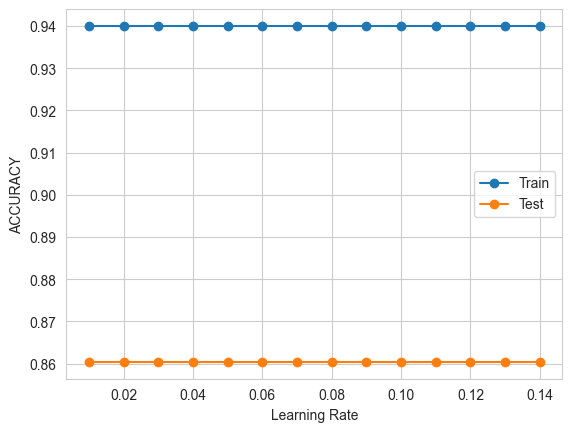

In [113]:
trs=[]
tes=[]
values=[i for  i in np.arange(0.01,0.15,0.01)]


for i in values:

	model= KNeighborsClassifier(n_neighbors=5)

	model.fit(X_train, Y_train)

	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y_train, train_yhat)
	trs.append(train_acc)

	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(Y_test, test_yhat)
	tes.append(test_acc)

	print('>%.2f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
plt.ylabel("ACCURACY")
plt.xlabel("Learning Rate")
plt.plot(values, trs, '-o', label='Train')
plt.plot(values, tes, '-o', label='Test')
plt.legend()
plt.show()

Checking for Overfitting

In [114]:
y = data["target"]
new_x = data.drop(columns=['target','fbs'],axis=1)
cols=new_x.columns
for col in cols:
   new_x[col]=minmax_scale(new_x[col])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.35, random_state =10)
fmodel=RandomForestClassifier(max_depth=5)
fmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [116]:
y_pred=fmodel.predict(X_test)
print("For Random Forest Classifier Model")
print("Testing dataset:")
print("ACCURACY:",accuracy_score(y_test,y_pred)*100)
print("PRECISION:",precision_score(y_test,y_pred)*100)
print("RECALL:",recall_score(y_test,y_pred,)*100)
print("F1:",f1_score(y_test,y_pred,)*100)

For Random Forest Classifier Model
Testing dataset:
ACCURACY: 89.69359331476323
PRECISION: 89.1891891891892
RECALL: 90.65934065934066
F1: 89.91825613079018


In [117]:
y_pred=fmodel.predict(X_train)
print("For Random Forest Classifier Model ")
print("Training dataset:")
print("ACCURACY:",accuracy_score(y_train,y_pred)*100)
print("PRECISION:",precision_score(y_train,y_pred)*100)
print("RECALL:",recall_score(y_train,y_pred,)*100)
print("F1:",f1_score(y_train,y_pred,)*100)

For Random Forest Classifier Model 
Training dataset:
ACCURACY: 94.74474474474475
PRECISION: 92.797783933518
RECALL: 97.38372093023256
F1: 95.0354609929078


In [118]:
y = data["target"]
X= data.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state =8,)
fmodel=RandomForestClassifier()
fmodel.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
#Input the value in order as shown above all can be input in form of interger values
sample =[[53,0,	140,	203,	1,	0,	155,	3.1,	0,	0,	3, 1, 1]]
out1= pd.DataFrame(sample, columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak','slope', 'ca', 'thal', 'sex', 'exang'])
y_pred=fmodel.predict(out1)
if(y_pred==1):
  print("RISK OF HEART DISEASE")
else:
  print("NO RISK OF HEART DISEASE")

NO RISK OF HEART DISEASE


In [120]:
sample1=[[52, 1, 0, 125, 212, 0,1, 168, 0, 1, 2, 2, 3]]
out2= pd.DataFrame(sample1, columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak','slope', 'ca', 'thal', 'sex', 'exang'])
y_pred=fmodel.predict(out2)
if(y_pred==1):
  print("RISK OF HEART DISEASE")
else:
  print("NO RISK OF HEART DISEASE")

NO RISK OF HEART DISEASE


In [60]:
sample2=[[58, 0, 0, 100, 248, 0,0, 122, 0, 1, 1, 0, 2]]
out3= pd.DataFrame(sample2, columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak','slope', 'ca', 'thal', 'sex', 'exang'])
y_pred=fmodel.predict(out3)
if(y_pred==1):
  print("RISK OF HEART DISEASE")
else:
  print("NO RISK OF HEART DISEASE")

RISK OF HEART DISEASE


In [121]:
import pickle

In [161]:
# pickle.dump(fmodel,open('Hridaya.pkl','wb'))